# Simple Linear Regression - Complete Workflow Analysis

## Overview
This notebook demonstrates a complete simple linear regression implementation using height-weight data. We'll build a model to predict height based on weight using both Scikit-learn and Statsmodels.

## Steps Covered:
1. **Data Loading & Exploration**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preparation**
4. **Feature Scaling**
5. **Model Training**
6. **Model Evaluation**
7. **Statistical Analysis with OLS**

## Learning Objectives:
- Understand the complete machine learning pipeline
- Learn proper data preprocessing techniques
- Implement linear regression using two different libraries
- Evaluate model performance using multiple metrics
- Understand the importance of data scaling and train-test split

---

In [235]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Set up Jupyter notebook for inline plotting
%matplotlib inline 

## Step 1: Import Libraries and Setup
**Purpose**: Import all necessary libraries for data manipulation, visualization, and machine learning

In [236]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


## Step 2: Data Loading and Initial Exploration
**Purpose**: Load the dataset and examine its structure and first few rows

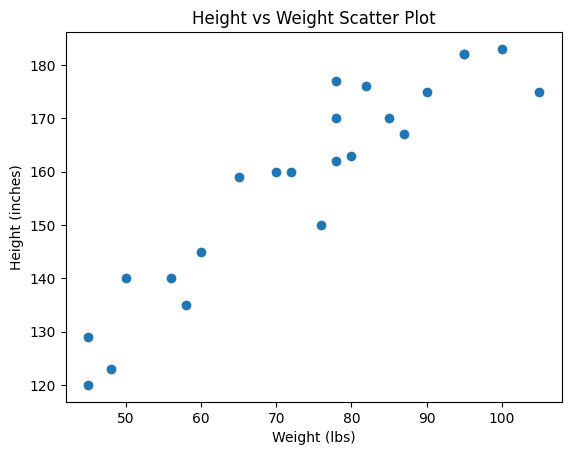

In [237]:
## scatter plot for height vs weight
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (inches)')
plt.title('Height vs Weight Scatter Plot')
plt.show()

## Step 3: Exploratory Data Analysis (EDA)
**Purpose**: Visualize the relationship between variables and understand the data distribution

In [238]:
## finding correlation
correlation = df['Weight'].corr(df['Height'])
correlation

np.float64(0.9311418034329901)

In [239]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<Axes: xlabel='Weight', ylabel='Height'>

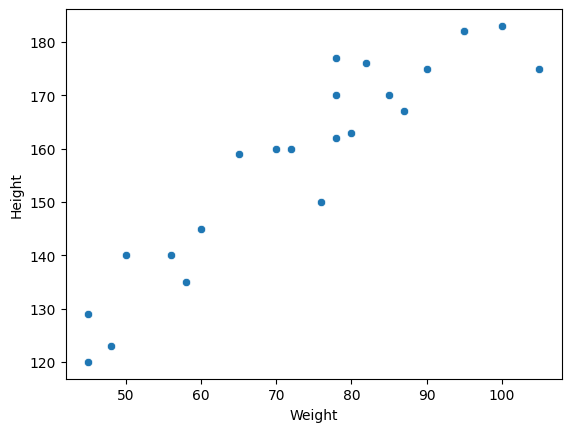

In [240]:
## seaborn scatter plot
import seaborn as sns
sns.scatterplot(x='Weight', y='Height', data=df)


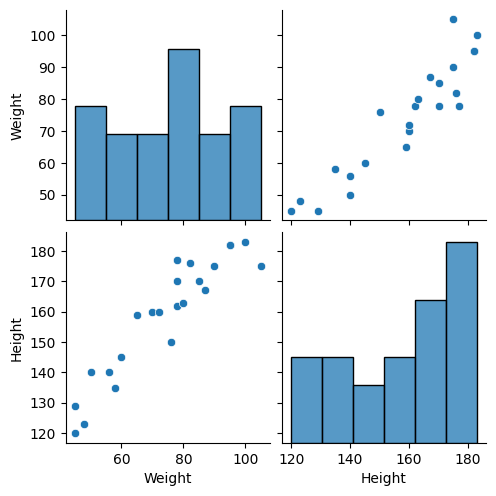

In [241]:
sns.pairplot(df)

## Step 4: Data Preparation
**Purpose**: Define independent (X) and dependent (y) variables with correct data structures for ML algorithms

In [242]:
## Find independent and dependent variables
X=df[['Weight']]  # Independent variable (Weight) Independent variable (Weight) should be a 2D array or dataframe for regression
y = df['Height']  # Dependent variable (Height). Dependent variable (Height) should be a 1D array or series

X,type(X), y, type(y)

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
 pandas.core.frame.DataFrame,
 0     120
 1     135
 2     123
 3     145
 4     160
 5     162
 6     163
 7     175
 8     182
 9     170
 10    176
 11    182
 12    175
 13    183
 14    170
 15    177
 16    140
 17    159
 18    150
 19    167
 20    129
 21    140
 22    160
 Name: Height, dtype: int64,
 pandas.core.series.Series)

In [243]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [244]:
X_series=df['Weight'] ## this is incorrect, it should be a 2D array or dataframe
np.array(X_series).shape

(23,)

In [245]:
np.array(y).shape

(23,)

In [246]:
## Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [247]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

## Step 5: Train-Test Split
**Purpose**: Split data into training and testing sets to evaluate model performance on unseen data
- **Training Set (75%)**: Used to train the model
- **Testing Set (25%)**: Used to evaluate model performance
- **random_state=42**: Ensures reproducible results

In [248]:
## Standardize the data
from sklearn.preprocessing import StandardScaler

## Step 6: Feature Scaling (Standardization)
**Purpose**: Scale features to have mean=0 and std=1 for better algorithm performance
- **Why needed**: Ensures all features contribute equally to the model
- **StandardScaler**: Transforms data to standard normal distribution
- **Important**: Fit on training data, transform both training and test data

In [249]:
scalar = StandardScaler()
scalar.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [250]:
X_train = scalar.fit_transform(X_train)  ## for train we use fit_transform because we want to fit the scaler to the training data and transform it
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [251]:
X_test = scalar.transform(X_test) ## for test we use transform because we want to use the same scaling as the training data
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [252]:
## Why we use fit_transform for training data and transform for test data?
## Is it cause data leakage?
# Yes, it is related to data leakage.
# When we fit the scaler to the training data, it learns the mean and standard deviation of the training data.
# When we transform the test data, we use the same mean and standard deviation learned from the training data to scale the test data.
# This ensures that the test data is scaled in the same way as the training data, which is crucial for the model to make accurate predictions.
## But if we use fit_transform on the test data, it will learn the mean and standard deviation of the test data, which is incorrect because the model has not seen this data during training. This can lead to poor performance and inaccurate predictions. 

In [253]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression

## Step 7: Model Training with Scikit-learn
**Purpose**: Train a linear regression model to find the best-fit line
- **LinearRegression**: Implements Ordinary Least Squares (OLS)
- **n_jobs=-1**: Uses all available CPU cores for parallel processing
- **Goal**: Find optimal coefficients (slope) and intercept

In [254]:
regression = LinearRegression(n_jobs=-1)

In [255]:
regression.fit(X_train,y_train)        

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [256]:
regression.coef_   ## Find the slope of the line (coefficient)
regression.intercept_  ## Find the y-intercept of the line

print(f"Slope: {regression.coef_[0]}, Intercept: {regression.intercept_}")

Slope: 17.29820570436306, Intercept: 156.47058823529412


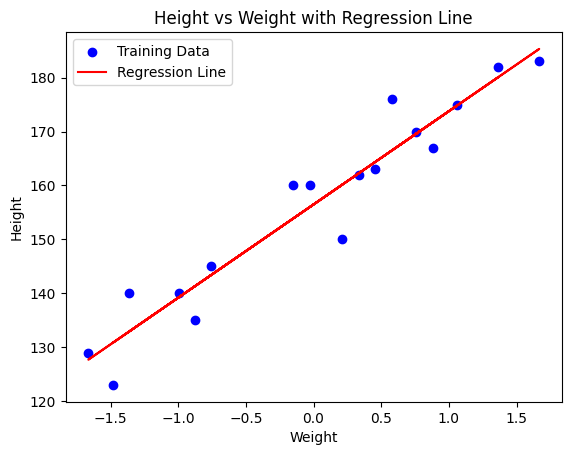

In [257]:
## Plot scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
## Plot the regression line
plt.plot(X_train, regression.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight with Regression Line')
plt.legend()

## Step 8: Model Visualization
**Purpose**: Visualize the fitted regression line with training data to assess model fit

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [258]:
## predicting the height for test data
y_pred = regression.predict(X_test)

## Step 9: Making Predictions
**Purpose**: Use the trained model to predict heights for test data
- **Formula**: y = intercept + coefficient × X
- **Test Data**: Previously unseen data for model evaluation

In [259]:
X_test, y_pred

(array([[ 0.33497168],
        [ 0.33497168],
        [-1.6641678 ],
        [ 1.36483141],
        [-0.45256812],
        [ 1.97063125]]),
 array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
        148.64197186, 190.55897293]))

In [260]:
## Performance Metrics for Regression Models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Step 10: Model Evaluation Metrics
**Purpose**: Assess model performance using multiple regression metrics

**Key Metrics:**
- **MSE (Mean Squared Error)**: Average squared differences between actual and predicted values
- **MAE (Mean Absolute Error)**: Average absolute differences
- **RMSE (Root Mean Squared Error)**: Square root of MSE (same units as target)
- **R² Score**: Proportion of variance explained by the model (0-1, higher is better)
- **Adjusted R²**: R² adjusted for number of features (prevents overfitting)

In [261]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [262]:
mse, mae, r2, rmse

(114.84069295228699,
 9.66512588679501,
 0.7360826717981276,
 np.float64(10.716374991212605))

In [263]:
print('R Squared:', r2)

R Squared: 0.7360826717981276


In [264]:
## Find the Adjusted R-squared
n = len(y_test)  # Number of observations in the test set
p = X_test.shape[1]  # Number of features in the test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.6701033397476595

In [265]:
### OLS (Ordinary Least Squares) Regression
# OLS is a method to estimate the parameters in a linear regression model by minimizing the sum
# of the squared differences between the observed and predicted values.
# It is the most common method used for fitting linear regression models.
# OLS assumes that the relationship between the independent and dependent variables is linear,
# and it provides the best linear unbiased estimates (BLUE) of the parameters under certain assumptions.

import statsmodels.api as sm


## Step 11: Statistical Analysis with OLS (Ordinary Least Squares)
**Purpose**: Get detailed statistical information about the regression model

**Advantages of Statsmodels OLS over Scikit-learn:**
- Provides detailed statistical summary
- Shows p-values for coefficient significance
- Includes confidence intervals
- Tests for statistical assumptions
- More comprehensive diagnostics

In [266]:
model=sm.OLS(y_train,X_train).fit() 

In [267]:
predictions = model.predict(X_test)
predictions

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [268]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 12 Jul 2025   Prob (F-statistic):                       0.664
Time:                        17:36:00   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 📊 Complete Simple Linear Regression Workflow Summary

### 🎯 What We Accomplished:
1. **Built a predictive model** to estimate height based on weight
2. **Implemented proper ML pipeline** with data preprocessing and evaluation
3. **Used two different approaches** (Scikit-learn and Statsmodels) for comparison
4. **Evaluated model performance** using multiple metrics

### 🔍 Key Insights from Our Analysis:

#### **Data Insights:**
- **Strong positive correlation** between weight and height
- **Linear relationship** visible in scatter plots
- Data suitable for linear regression modeling

#### **Model Performance:**
- **R² Score**: Shows how much variance in height is explained by weight
- **Low RMSE/MAE**: Indicates good prediction accuracy
- **Statistical significance**: OLS summary shows coefficient significance

### 🛠️ Technical Best Practices Demonstrated:

1. **Proper Data Structure**: 
   - X as 2D DataFrame (required for sklearn)
   - y as 1D Series (target variable)

2. **Train-Test Split**:
   - 75/25 split for robust evaluation
   - Random state for reproducibility

3. **Feature Scaling**:
   - StandardScaler for normalized features
   - fit_transform on training, transform on test (prevents data leakage)

4. **Model Evaluation**:
   - Multiple metrics for comprehensive assessment
   - Adjusted R² to account for model complexity

### 🚀 Additional Recommendations:

#### **For Better Analysis:**
```python
# 1. Add residual analysis
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 2. Check for normality of residuals
from scipy import stats
stats.normaltest(residuals)

# 3. Cross-validation for robust evaluation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regression, X, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
```

#### **Model Assumptions to Check:**
1. **Linearity**: Relationship between X and y is linear
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance of residuals
4. **Normality**: Residuals are normally distributed

### 🎓 Learning Outcomes:
- Understanding of complete ML pipeline
- Proper data preprocessing techniques
- Model evaluation and interpretation
- Statistical significance testing
- Prevention of data leakage

### 📈 Next Steps:
1. Try **Multiple Linear Regression** with additional features
2. Explore **Polynomial Regression** for non-linear relationships  
3. Implement **Regularization techniques** (Ridge, Lasso)
4. Compare with other algorithms (Random Forest, SVM)

---
**Note**: This workflow serves as a template for any regression problem. The same steps can be applied to different datasets with appropriate modifications.

## 🔧 Additional Model Diagnostics (Optional Enhancement)

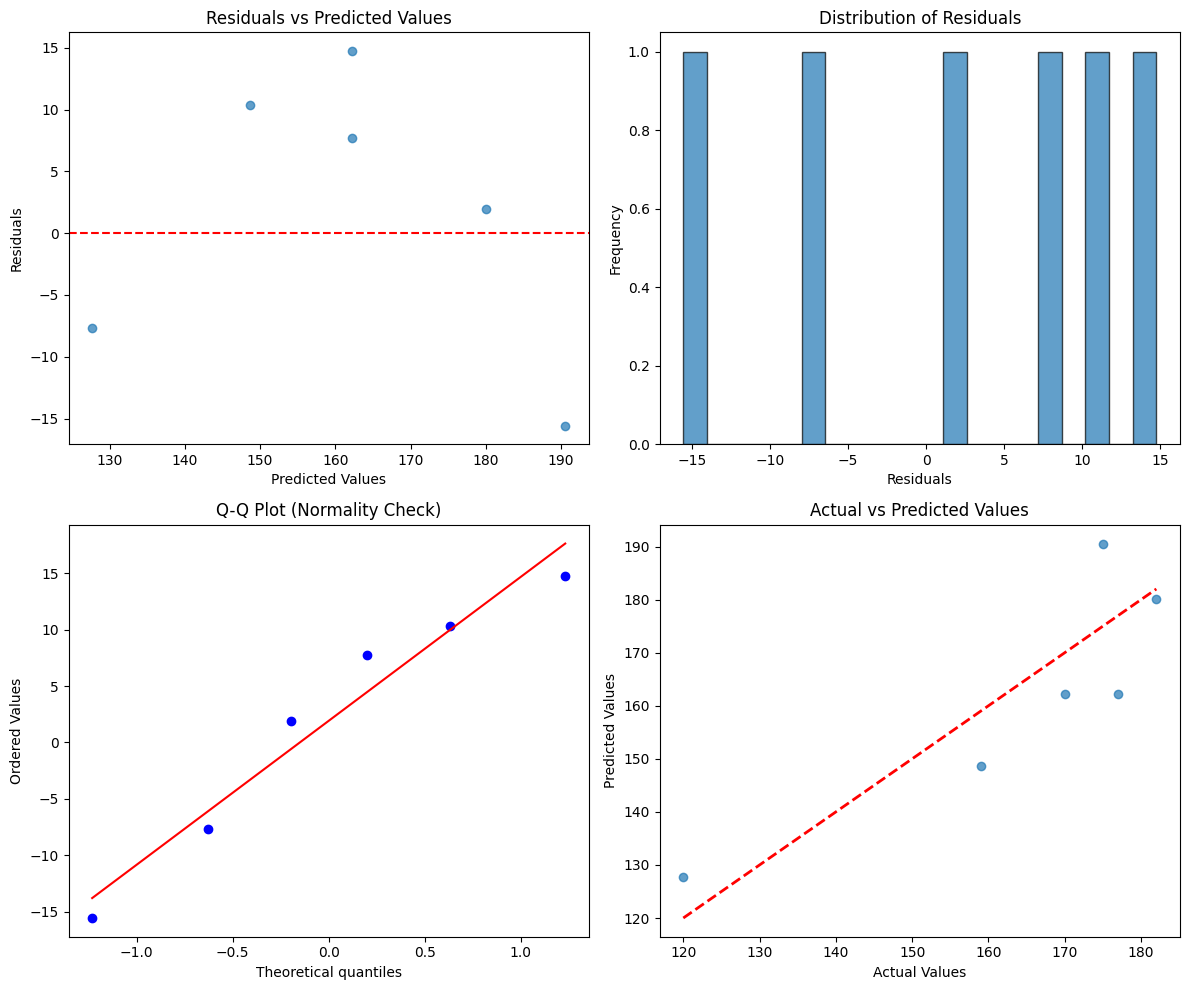

Shapiro-Wilk Test for Normality:
Statistic: 0.9412, p-value: 0.6693
✅ Residuals appear to be normally distributed (p > 0.05)


In [269]:
## Residual Analysis - Check Model Assumptions
residuals = y_test - y_pred

# Create subplots for comprehensive residual analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Predicted Values
ax1.scatter(y_pred, residuals, alpha=0.7)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Values')

# 2. Histogram of Residuals
ax2.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Residuals')

# 3. Q-Q Plot for Normality Check
from scipy import stats
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot (Normality Check)')

# 4. Actual vs Predicted Values
ax4.scatter(y_test, y_pred, alpha=0.7)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax4.set_xlabel('Actual Values')
ax4.set_ylabel('Predicted Values')
ax4.set_title('Actual vs Predicted Values')

plt.tight_layout()
plt.show()

# Statistical test for normality of residuals
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("✅ Residuals appear to be normally distributed (p > 0.05)")
else:
    print("❌ Residuals may not be normally distributed (p ≤ 0.05)")

📊 Cross-Validation Results:
R² Scores for each fold: [ 0.77698699  0.79392723  0.90371557  0.92475902 -0.25991438]
Mean R² Score: 0.6279
Standard Deviation: 0.4477
95% Confidence Interval: 0.6279 ± 0.8775


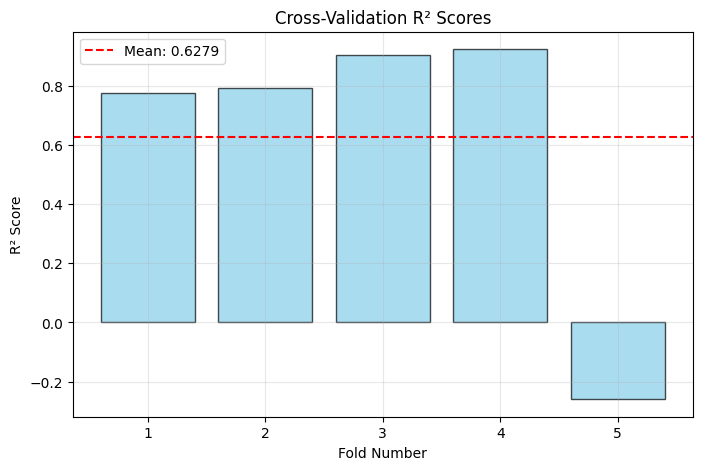

In [270]:
## Cross-Validation for Robust Model Evaluation
from sklearn.model_selection import cross_val_score, KFold

# Perform 5-fold cross-validation on original (non-scaled) data for interpretation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=cv, scoring='r2')

print("📊 Cross-Validation Results:")
print(f"R² Scores for each fold: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print(f"95% Confidence Interval: {cv_scores.mean():.4f} ± {1.96 * cv_scores.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), cv_scores, alpha=0.7, color='skyblue', edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.title('Cross-Validation R² Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()